In [24]:
import pandas as pd
import numpy as np

import math
import seaborn as sns


import random
from datetime import datetime, timedelta

from statsmodels.datasets import get_rdataset


from matplotlib.pyplot import subplots
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import OLS
import sklearn. model_selection as skm
import sklearn. linear_model as skl
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
!pip install ISLP
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn. pipeline import Pipeline
from sklearn. decomposition import PCA
from sklearn. cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path )
!pip install l0bnb
from l0bnb import fit_path

In [25]:
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering )
from scipy.cluster. hierarchy import \
(dendrogram ,
cut_tree )
from ISLP.cluster import compute_linkage
from sklearn.decomposition import PCA

##Analyzing trends between Global FX Markets and SPX returns using Principal Component Analysis.

In [26]:
fx = pd.read_csv('FXmonthly.csv')
sp500 = pd.read_csv('sp500.csv')

#Translating prices into returns for fx data

In [27]:
fx_returns = fx.pct_change().dropna()
fx_returns.reset_index(drop=True, inplace=True)

print(fx_returns)


       exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
0    0.040084  0.025510  0.012241 -0.000060  0.018511  0.000013 -0.001073   
1    0.061012  0.044616  0.024382  0.000048  0.013884  0.000000  0.001933   
2    0.002968  0.046719 -0.000577 -0.000048  0.017366 -0.000077  0.003001   
3   -0.035213  0.045227 -0.010720 -0.000012  0.019114  0.000077  0.003420   
4    0.003691  0.037599 -0.010772  0.000000  0.025113 -0.000026  0.001917   
..        ...       ...       ...       ...       ...       ...       ...   
114 -0.024249 -0.005653 -0.001727  0.001638 -0.007460 -0.000656 -0.006416   
115 -0.041869 -0.023253 -0.007113 -0.007028 -0.015205 -0.000759 -0.012699   
116 -0.042853 -0.019965 -0.014618 -0.010653 -0.056782 -0.000811 -0.033137   
117 -0.007167  0.017462 -0.004912 -0.002100  0.018252 -0.000438  0.013078   
118 -0.003956 -0.010274 -0.004739 -0.000616  0.032023  0.002450  0.003784   

       exjpus    exkous    exmaus  ...    exsius    exsfus    exslus  \
0  

#1. Discuss correlation amongst variables of fx. How does this relate to the applicability of PCA?

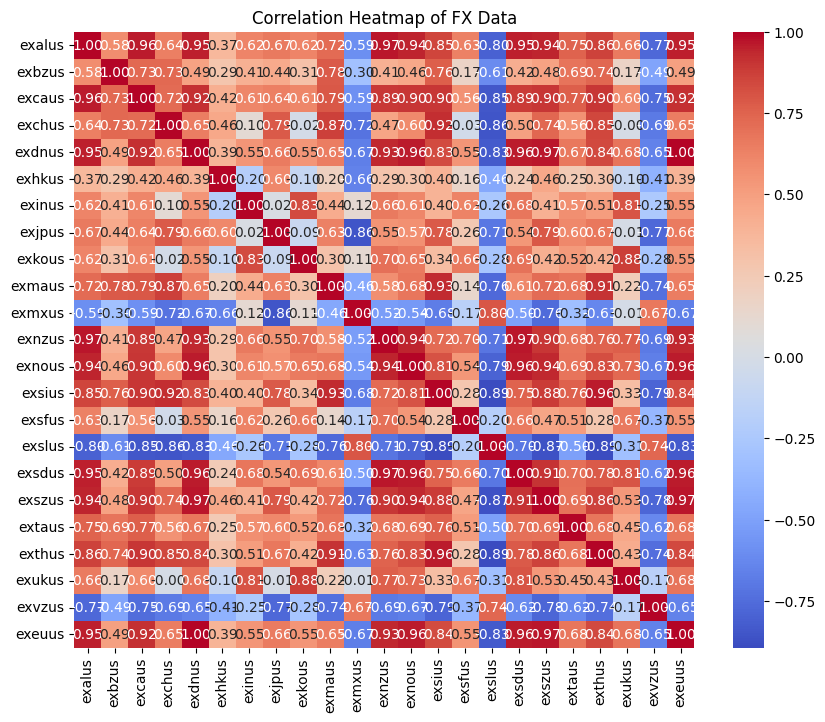

In [28]:
correlation_matrix = fx.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of FX Data')
plt.show()

#There are many strong negative an positive correlations in the heatmap, which suggests that PCA is likely to be applicable and effective in reducing the dimensionality of the data.


#2. Fit, plot, and interpret principal components (PCs)



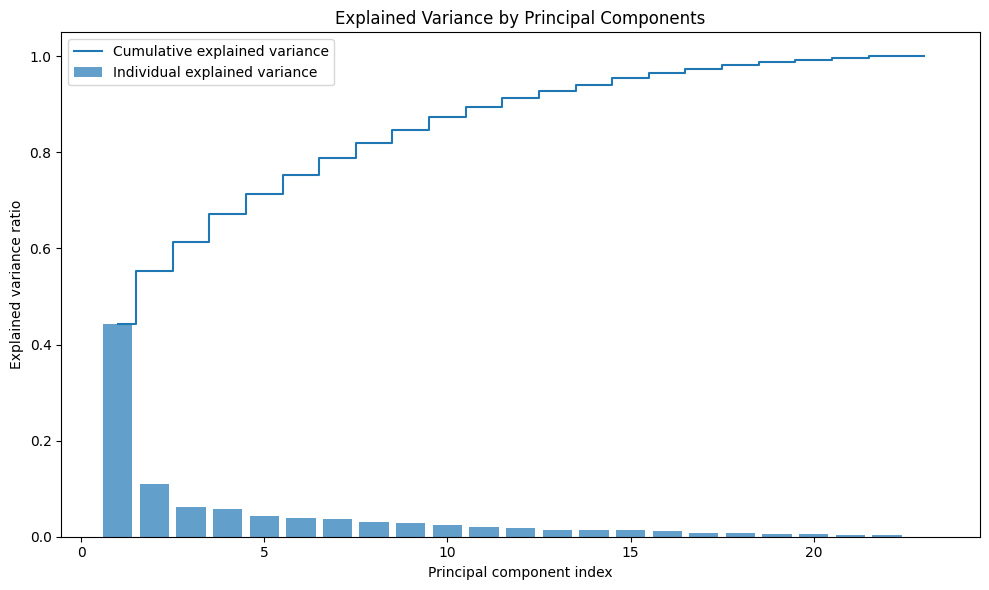

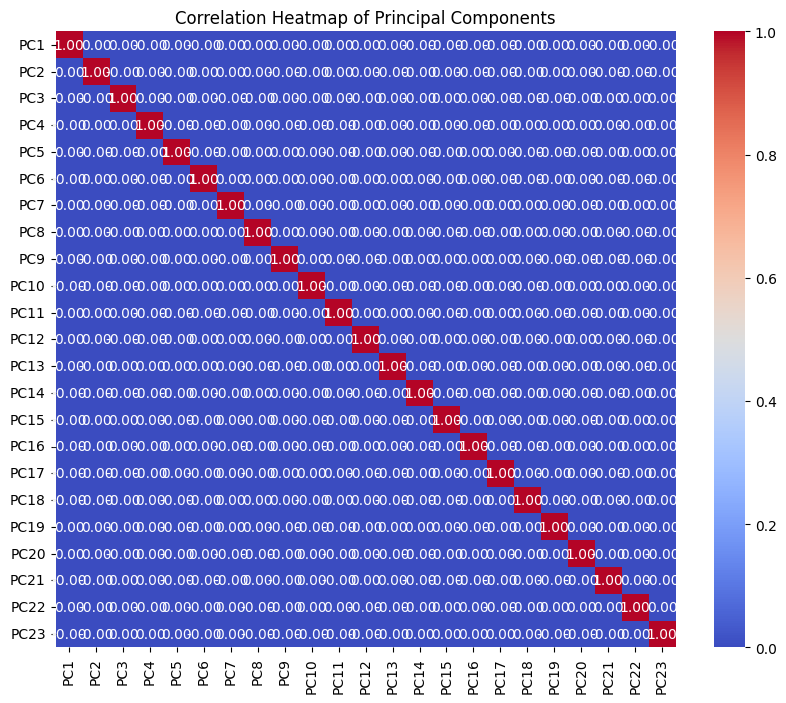


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

In [29]:

scaler = StandardScaler()
fx_returns = fx.pct_change().dropna()
fx_scaled = scaler.fit_transform(fx_returns)

pca = PCA()
pca.fit(fx_scaled)

principal_components = pca.transform(fx_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7,
        align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio),
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(principal_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)

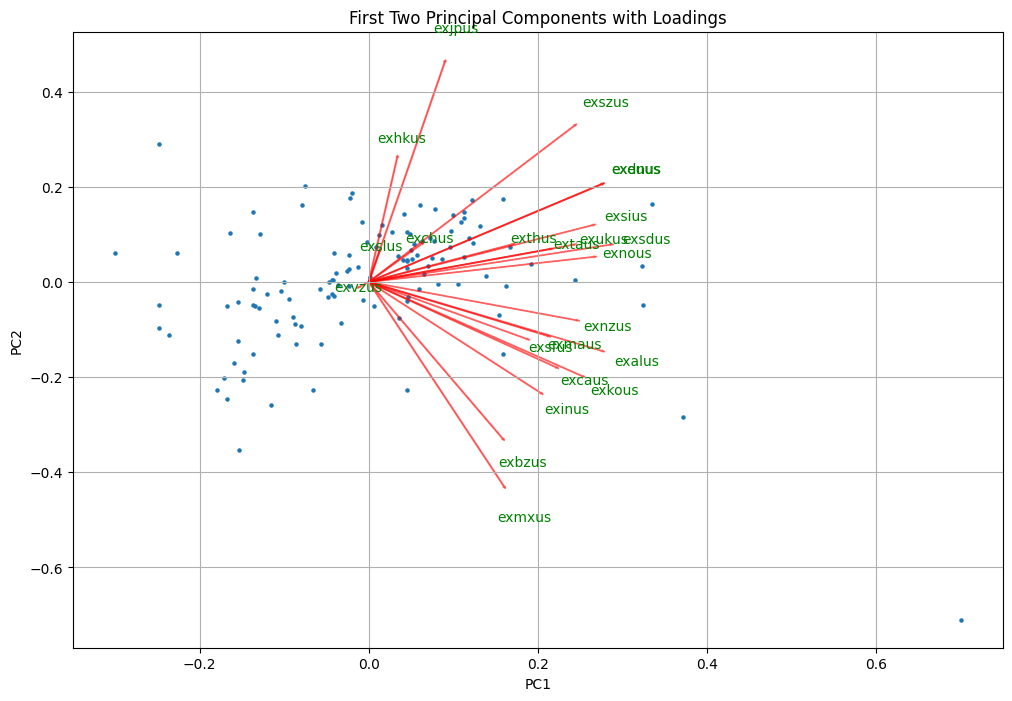

In [30]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12, 8))
myplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]),labels=fx_returns.columns)
plt.title('First Two Principal Components with Loadings')
plt.show()

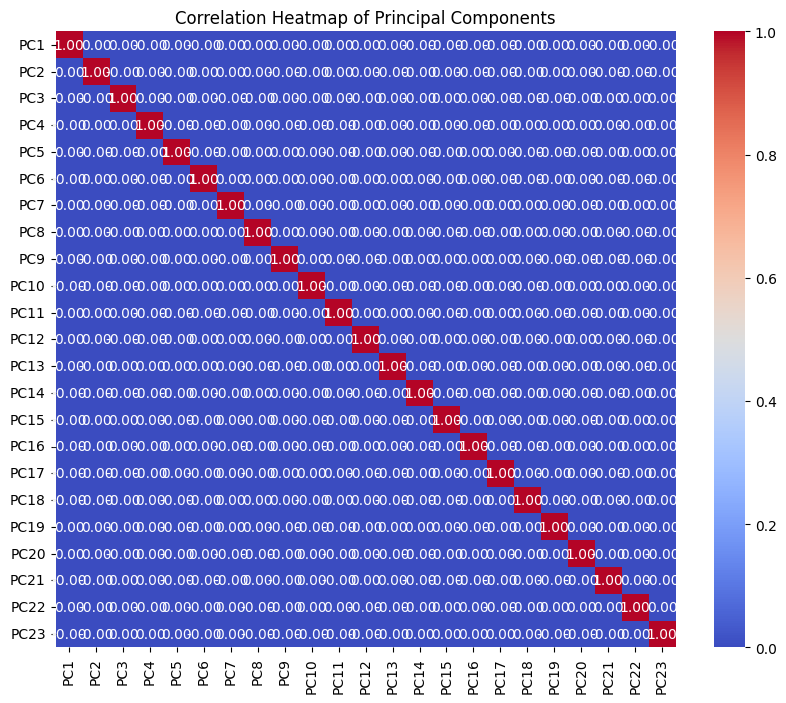


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

In [31]:
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(principal_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Principal Components')
plt.show()

loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)

In [32]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=fx_returns.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])])
print("\nLoadings:")
print(loadings_df)


Loadings:
        exalus    exbzus    excaus    exchus    exdnus    exhkus    exinus  \
PC1   0.275463  0.158535  0.221442  0.062782  0.275591  0.033654  0.203542   
PC2  -0.144796 -0.329430 -0.179288  0.079985  0.205398  0.261870 -0.233386   
PC3  -0.122285 -0.030565 -0.221280  0.128067 -0.111448 -0.416356  0.193629   
PC4  -0.021782  0.289838 -0.019699  0.636050  0.030158  0.051164 -0.051118   
PC5   0.007801  0.156807  0.105703 -0.297181 -0.162068  0.443655  0.267706   
PC6   0.032159  0.101121  0.159342 -0.402505  0.073989 -0.050377 -0.157220   
PC7   0.044289  0.058580  0.277029  0.045081 -0.092063  0.576631  0.050373   
PC8  -0.163390 -0.330407 -0.041466 -0.031450  0.051940 -0.042685  0.221378   
PC9  -0.142906 -0.222814 -0.298417 -0.310165  0.078816  0.072280  0.259238   
PC10 -0.008026  0.120329 -0.055762 -0.286746  0.024497 -0.118111 -0.151010   
PC11  0.244114 -0.418273  0.030605  0.034359 -0.134317 -0.005663 -0.271585   
PC12 -0.174928 -0.095436 -0.345923  0.191989 -0.06837

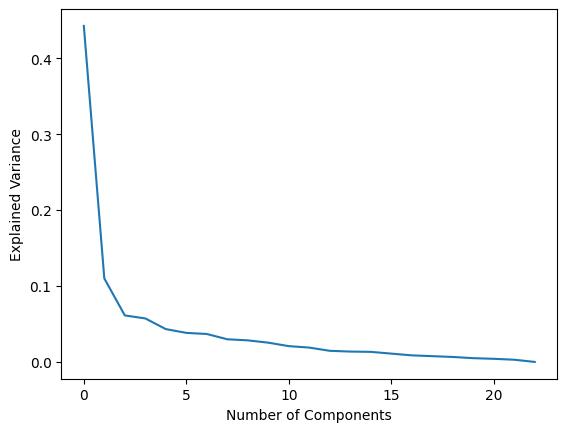

In [33]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [34]:
important_pc = []
for i, ratio in enumerate(explained_variance_ratio):
    if ratio >= 0.05:
        important_pc.append(i)
    else:
        break

print("Important principal components:", important_pc)



Important principal components: [0, 1, 2, 3]


# PC1 represents the overall movement of the USD against other currencies. It captures the common trend or variation among most of the currency pairs in the dataset. It also has high loadings for most of the currency pairs, especially those related to the USD. This indicates that the USD's strength or weakness is the dominant factor driving this principal component. A positive value for PC1 suggests a strong USD, while a negative value suggests a weak USD.

#PC2 captures the relative movement between specific currency pairs and the USD. It represents a more localized variation in the data. PC2 has high loadings for some specific currency pairs. This indicates that these currencies have a distinct relationship with the USD, which is not fully captured by PC1. PC2 might also reflect specific economic factors affecting these currency pairs. For example, it could be related to interest rate differentials, trade balances, or political events impacting these currencies.

#PC3 may be capturing a specific movement of the USD against a basket of other currencies. If, for example, some currencies are correlated with PC3 negatively and some are correlated with it positively, it may indicate diversification, the movements that diversify a portfolio of various currencies.

#3. Regress SP500 returns onto currency movement PCs, using both "glm on first K" and lasso techniques. Use the results to add to your factor interpretation.

In [35]:
x = principal_df[[f"PC{i+1}" for i in range(principal_components.shape[1])]]
y = sp500['sp500']
model_glm = smf.ols('y ~ x', data=pd.concat([y, x], axis=1)).fit()


print(model_glm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     5.125
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           6.10e-09
Time:                        00:33:12   Log-Likelihood:                 242.61
No. Observations:                 119   AIC:                            -437.2
Df Residuals:                      95   BIC:                            -370.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.003      0.137      0.8

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

alphas = np.logspace(-4, -0.1, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas},
                        scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(x_train, y_train)
best_lasso = lasso_cv.best_estimator_
lasso_pred = best_lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nLasso Regression:")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Test MSE:", lasso_mse)

best_lasso_coefficients = best_lasso.coef_
predictor_names = x_train.columns
coefficients_original_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': best_lasso_coefficients})
print("\nCoefficients of the best Lasso Regression model:")
print(coefficients_original_df)

r2 = r2_score(y_test, lasso_pred)
print("R-squared:", r2)



Lasso Regression:
Best alpha: 0.006158482110660267
Test MSE: 0.0019509740442679856

Coefficients of the best Lasso Regression model:
   Predictor  Coefficient
0        PC1    -0.004738
1        PC2     0.009246
2        PC3     0.004459
3        PC4    -0.000000
4        PC5    -0.000000
5        PC6     0.000000
6        PC7     0.000000
7        PC8    -0.000000
8        PC9    -0.000000
9       PC10    -0.000000
10      PC11     0.000000
11      PC12    -0.000000
12      PC13     0.000000
13      PC14    -0.000000
14      PC15     0.000000
15      PC16    -0.000000
16      PC17     0.000000
17      PC18     0.000000
18      PC19    -0.000000
19      PC20    -0.000000
20      PC21    -0.000000
21      PC22    -0.000000
22      PC23     0.000000
R-squared: 0.16474217840659489


#USD strength (PC1) is a primary positive driver of SP500 returns. A stronger USD tends to be associated with higher stock market performance.Specific relative currency movements (PC2) can negatively impact SP500 returns. Certain currency relationships, likely related to trade or investment flows, might have an adverse effect on the stock market. Other currency movements (PC3) have less predictive power for SP500 returns. These movements might be less relevant to the US stock market or have offsetting effects. In essence, the analysis suggests that while a strong USD generally benefits the US stock market, specific currency relationships should also be considered, as they can have a negative influence.




#4. Fit lasso to the original covariates and describe how it differs from the principal components regression here

In [42]:
x = fx_returns
y = sp500['sp500']

alphas = np.logspace(-4, -0.1, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas},
                        scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(x_train, y_train)
best_lasso = lasso_cv.best_estimator_
lasso_pred = best_lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nLasso Regression:")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Test MSE:", lasso_mse)

best_lasso_coefficients = best_lasso.coef_
predictor_names = x_train.columns
coefficients_original_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': best_lasso_coefficients})
print("\nCoefficients of the best Lasso Regression model:")
print(coefficients_original_df)

r2 = r2_score(y_test, lasso_pred)
print("R-squared:", r2)



Lasso Regression:
Best alpha: 0.0001
Test MSE: 0.0019309601390201335

Coefficients of the best Lasso Regression model:
   Predictor  Coefficient
0     exalus    -0.053458
1     exbzus    -0.197050
2     excaus    -0.000000
3     exchus     0.000000
4     exdnus     0.000000
5     exhkus    -0.000000
6     exinus    -0.000000
7     exjpus     0.002636
8     exkous    -0.000000
9     exmaus    -0.000000
10    exmxus    -0.443336
11    exnzus     0.000000
12    exnous     0.000000
13    exsius     0.000000
14    exsfus    -0.122190
15    exslus     0.000000
16    exsdus    -0.088526
17    exszus     0.000000
18    extaus     0.000000
19    exthus     0.000000
20    exukus     0.000000
21    exvzus    -0.062295
22    exeuus     0.000000
R-squared: 0.17331060141971089


#Specific currency pairs (e.g., EUR/USD, JPY/USD) directly influence SP500 returns, often with opposing effects. Most individual currency movements have minimal direct impact on the SP500. this highlights the importance of specific currency relationships, rather than just overall USD strength, for predicting SP500 performance.



#5. Bonus: Fit PLS and compare to PCA.






In [38]:
from sklearn.cross_decomposition import PLSRegression


In [39]:
x = principal_df[[f"PC{i+1}" for i in range(principal_components.shape[1])]]
y = sp500['sp500']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pls_model = PLSRegression(n_components=3)
pls_model.fit(x_train, y_train)
y_pred_pls = pls_model.predict(x_test)
mse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)

print("Mean Squared Error (PLS):", mse_pls)
print("R-squared (PLS):", r2_pls)
print("PLS Coefficients:", pls_model.coef_)


Mean Squared Error (PLS): 0.0019388338154821055
R-squared (PLS): 0.16993969555405875
PLS Coefficients: [[-0.00524309  0.01139584  0.00795116 -0.00396465 -0.00446636  0.00290865
   0.00215899 -0.00386365  0.00193976 -0.00600614  0.00601505 -0.00606796
   0.00403261 -0.00763143  0.00631624 -0.0048007   0.01596152  0.00606072
  -0.00580768 -0.02963494 -0.02247624 -0.02064508  0.52504983]]


#PLS is a supervising learning model while PCA is an unsupervised model. PCA reduced dimensionlity and looked for common trends within the covariates then onto the SP500 returns. With a focus on catching underlying patterns in currency movements. PLS directly considered the relationship between each currency movement and the SP500 movements. If i was more interested in predicting trends or movements in the SP500 I would most likely have chosen thhe PLS model as that is its focus and goal and seems to have a better performance there. Howeeer PCA did give a better analysis of the trends in the data and the dimensionality reductions made it easier to understrand the broader trends within currency movements as a whole.